In [1]:
import os
os.listdir('data')

['.ipynb_checkpoints',
 'Advertising.csv',
 'auto.csv',
 'boston.csv',
 'caravan.csv',
 'carseats.csv',
 'college.csv',
 'Credit.csv',
 'default.csv',
 'hitters.csv',
 'khan_xtest.csv',
 'khan_xtrain.csv',
 'khan_ytest.csv',
 'khan_ytrain.csv',
 'nci60_data.csv',
 'nci60_labs.csv',
 'optdigits.tes',
 'optdigits.tes.txt',
 'optdigits.tra',
 'portfolio.csv',
 'smarket.csv',
 'titanic.csv',
 'usarrests.csv',
 'wage.csv',
 'weekly.csv']

# Wage data introduced
All data is in the data directory. This data was downloaded from the ISLR and MASS R packages

In [2]:
# Bring data into workspace and replicate plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_wage = pd.read_csv('data/wage.csv')

In [5]:
df_wage.head(10)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
5,2008,54,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744
6,2009,44,1. Male,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538
7,2008,30,1. Male,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
8,2006,41,1. Male,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
9,2004,52,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488


In [6]:
df_wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   sex         3000 non-null   object 
 3   maritl      3000 non-null   object 
 4   race        3000 non-null   object 
 5   education   3000 non-null   object 
 6   region      3000 non-null   object 
 7   jobclass    3000 non-null   object 
 8   health      3000 non-null   object 
 9   health_ins  3000 non-null   object 
 10  logwage     3000 non-null   float64
 11  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 281.4+ KB


In [7]:
df_wage.describe(include=['object'])

,sex,maritl,race,education,region,jobclass,health,health_ins
count,3000,3000,3000,3000,3000,3000,3000,3000
unique,1,5,4,5,1,2,2,2
top,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes
freq,3000,2074,2480,971,3000,1544,2142,2083


In [8]:
# Look at all available plotting styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [9]:
plt.style.use("ggplot")

In [10]:
# need to reshape data to plot correctly
df_edu = df_wage.pivot(columns='education', values='wage')

In [11]:
df_edu.head(15)

education,1. < HS Grad,2. HS Grad,3. Some College,4. College Grad,5. Advanced Degree
0,75.043154,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,70.476020,NaN
2,NaN,NaN,130.982177,NaN,NaN
3,NaN,NaN,NaN,154.685293,NaN
4,NaN,75.043154,NaN,NaN,NaN
5,NaN,NaN,NaN,127.115744,NaN
6,NaN,NaN,169.528538,NaN,NaN
7,NaN,NaN,111.720849,NaN,NaN
8,NaN,NaN,118.884359,NaN,NaN
9,NaN,128.680488,NaN,NaN,NaN


In [12]:
# importing statsmodels library to fit lowess curve through data
import statsmodels.api as sm

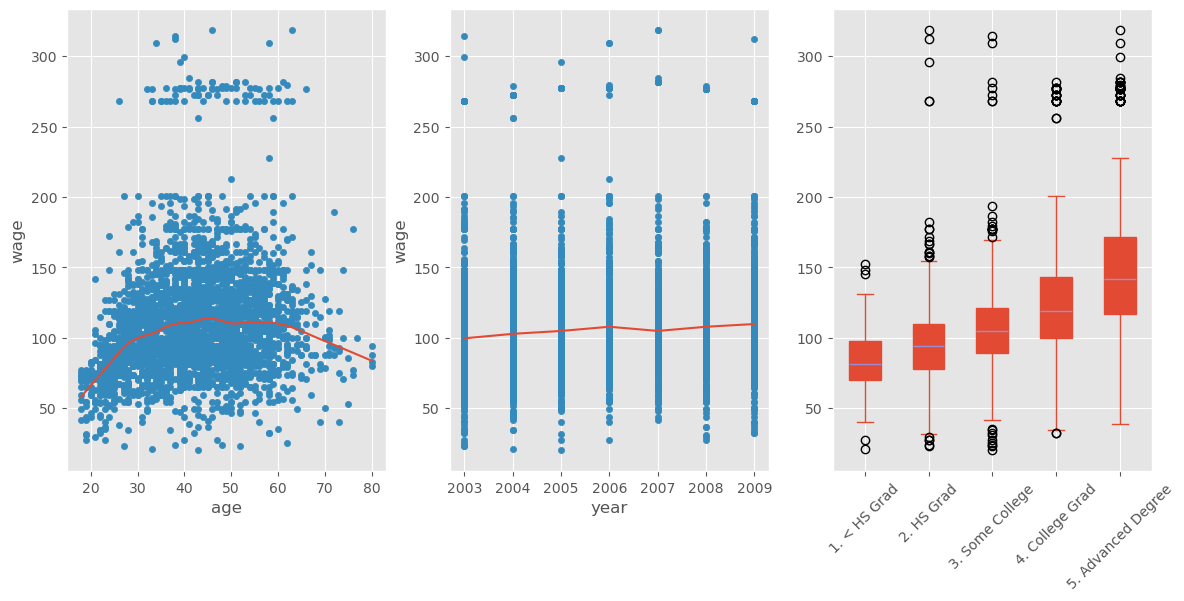

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))
df_wage.plot.scatter('age', 'wage', ax=ax[0])
lowess = sm.nonparametric.lowess(df_wage['wage'], df_wage['age'], frac=.2)
ax[0].plot(lowess[:, 0], lowess[:, 1])

df_wage.plot.scatter('year', 'wage', ax=ax[1])
year_median = df_wage.groupby('year')['wage'].median()
ax[1].plot(year_median)

boxplot = df_edu.plot.box(ax=ax[2], rot=45, patch_artist=True)
colors = ['lightblue', 'green', 'yellow', 'blue', 'red']
for artist, color in zip(boxplot.artists, colors):
    artist.set_facecolor(color)

plt.show()

In [22]:
import seaborn as sns

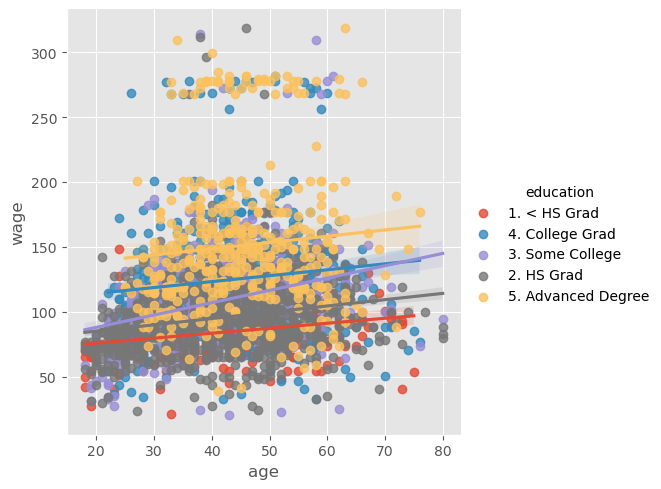

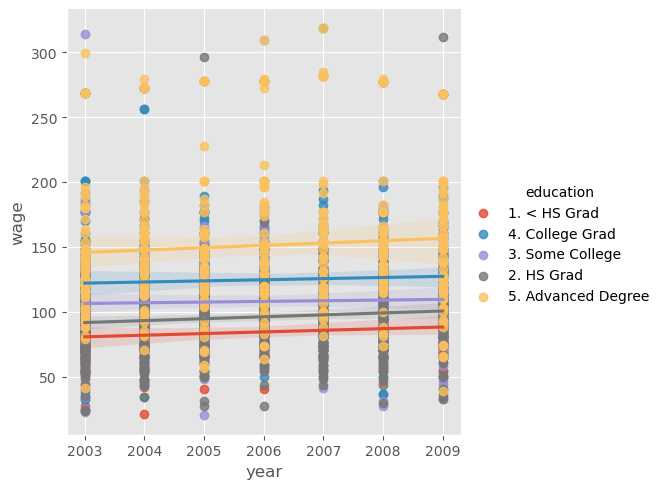

In [28]:
# Similar plots to those above
sns.lmplot(x='age', y='wage', data=df_wage, hue='education')
sns.lmplot(x='year', y='wage', data=df_wage, ci=99.99, hue='education')
plt.show()

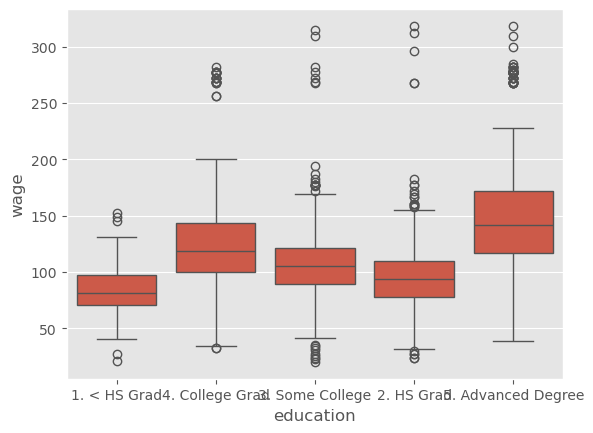

In [29]:
sns.boxplot(x='education', y='wage', data=df_wage);
plt.show()

In [17]:
df1 = df_wage[['age', 'year', 'education', 'wage']]
df1.head()

,age,year,education,wage
0,18,2006,1. < HS Grad,75.043154
1,24,2004,4. College Grad,70.476020
2,45,2003,3. Some College,130.982177
3,43,2003,4. College Grad,154.685293
4,50,2005,2. HS Grad,75.043154


In [ ]:
df_melt = pd.melt(df1, id_vars=['education', 'wage'])

In [ ]:
df_melt.head()

In [ ]:
seaborn_grid = sns.lmplot(x='value', y='wage', col='variable', hue='education', data=df_melt, sharex=False)
seaborn_grid.fig.set_figwidth(8)

left, bottom, width, height = seaborn_grid.fig.axes[0]._position.bounds
left2, bottom2, width2, height2 = seaborn_grid.fig.axes[1]._position.bounds
left_diff = left2 - left
seaborn_grid.fig.add_axes((left2 + left_diff, bottom, width, height))

sns.boxplot(x='education', y='wage', data=df_wage, ax = seaborn_grid.fig.axes[2])
ax2 = seaborn_grid.fig.axes[2]
ax2.set_yticklabels([])
ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)
ax2.set_ylabel('')
ax2.set_xlabel('');

leg = seaborn_grid.fig.legends[0]
leg.set_bbox_to_anchor([0, .1, 1.5,1])

# Regression vs Classification


In [30]:
df_smarket = pd.read_csv('data/smarket.csv')

In [31]:
df_smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [32]:
# Put all lags in one column. Make 'Tidy' Data
df_smarket_pivot = pd.melt(df_smarket, 
                           id_vars='Direction', 
                           value_vars=['Lag1', 'Lag2', 'Lag3'], 
                           var_name='Lag Type', 
                           value_name='Pct Change')

In [33]:
df_smarket_pivot.head()

,Direction,Lag Type,Pct Change
0,Up,Lag1,0.381
1,Up,Lag1,0.959
2,Down,Lag1,1.032
3,Up,Lag1,-0.623
4,Up,Lag1,0.614


c:\Users\Hathim\anaconda3\envs\MScDSA\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


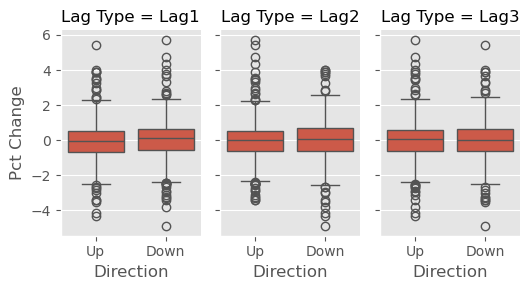

In [36]:
g = sns.FacetGrid(df_smarket_pivot, col="Lag Type", aspect=.6)
g = g.map(sns.boxplot, "Direction", "Pct Change")
plt.show()

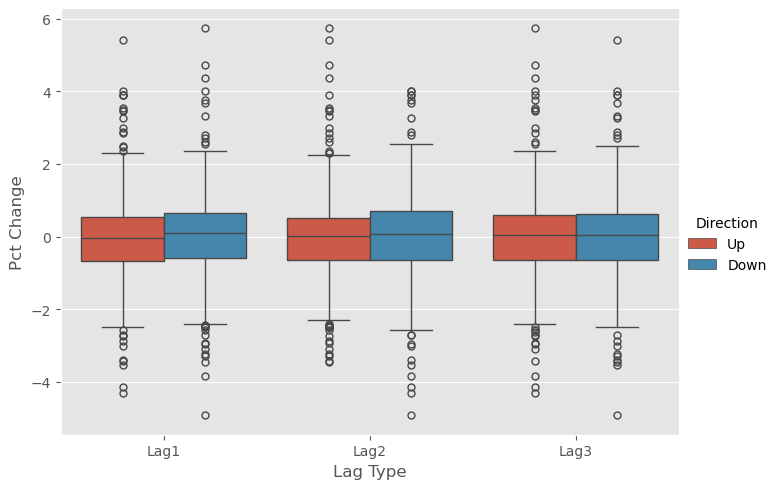

In [37]:
sns.catplot(x="Lag Type", y="Pct Change", hue="Direction",data=df_smarket_pivot, kind="box", aspect=1.4)
plt.show()

# Clustering
No longer interested in prediction - looking to discover underlying similarities in the data

In [38]:
df_genes = pd.read_csv('data/nci60_data.csv', index_col=0)

In [39]:
df_genes.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(2)

In [42]:
df_genes_transformed = pd.DataFrame(pca.fit_transform(df_genes), columns=['PC1', 'PC2'])

In [43]:
from sklearn.cluster import KMeans

In [44]:
kmeans = KMeans(4)

In [45]:
kmeans.fit(df_genes_transformed)

c:\Users\Hathim\anaconda3\envs\MScDSA\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Hathim\anaconda3\envs\MScDSA\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Hathim\anaconda3\envs\MScDSA\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Hathim\anaconda3\envs\MScDSA\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Hathim\anaconda3\envs\MScDSA\Lib\subprocess.py", line

KMeans(n_clusters=4)

In [46]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 3, 3, 1, 3, 3, 3],
      dtype=int32)

In [47]:
df_genes_transformed['cluster'] = kmeans.labels_

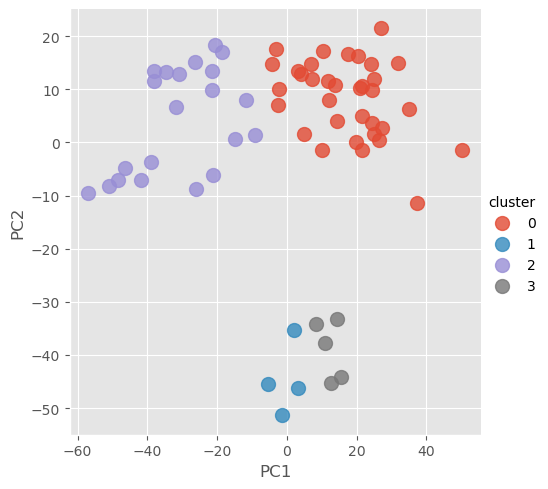

In [50]:
sns.lmplot(x='PC1', y='PC2', data=df_genes_transformed, fit_reg=False, hue='cluster', 
           scatter_kws={"marker": "D", "s": 100})
plt.show()

## Advertising Data
The advertising data consists of product sales from 200 markets and their associated tv, radio, and newspaper advertising budgets. What kind of relationship can be seen between advertising budget and sales

In [ ]:
df_adv = pd.read_csv('data/Advertising.csv')
df_adv.head(10)

In [ ]:
df_adv_new = pd.melt(df_adv, value_vars=['TV', 'Radio', 'Newspaper'], id_vars='Sales', value_name='adv_budget')
df_adv_new.head(10)

In [ ]:
sns.lmplot(x='adv_budget', y='Sales', data=df_adv_new, hue='variable', fit_reg=False);

In [ ]:
lm = sns.lmplot(x='adv_budget', y='Sales', data=df_adv_new, col='variable', sharey=False, sharex=False, lowess=True);
axes = lm.axes
for i, ax in enumerate(axes[0]):
    ax.set_xlim(0,)
    ax.set_title(lm.col_names[i])
    ax.set_xlabel('Advertising Budget')

# Training Data vs Testing Data
**Training Data** - Data used to build a prediction model. Should not be used to validate the model.  
**Testing Data** - Data used to determine the usefulness of the model. Validates the model. This data is unseen during model building phase.



In [ ]:
num_points = 30

In [ ]:
np.random.seed(12345)
x = np.linspace(1,13, num_points).reshape(-1, 1)
error = np.random.randn(num_points, 1) * num_points
f = lambda x: (x - 2) * (x - 6) * (x - 12)

y = f(x) + error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=10)
X = poly.fit_transform(x)

In [ ]:
obs_nums = np.arange(0, num_points)
np.random.shuffle(obs_nums)

top_70 = int(num_points * .7)
rand_train = np.sort(obs_nums[:top_70])
rand_test = np.sort(obs_nums[top_70:])

In [ ]:
X_train = X[rand_train]
X_test = X[rand_test]
y_train = y[rand_train]
y_test = y[rand_test]

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train[:, :2], y_train)
y_train_2 = linreg.predict(X_train[:, :2])
y_test_2 = linreg.predict(X_test[:, :2])

linreg.fit(X_train[:, :4], y_train)
y_train_4 = linreg.predict(X_train[:, :4])
y_test_4 = linreg.predict(X_test[:, :4])

linreg.fit(X_train, y_train)
y_train_10 = linreg.predict(X_train)
y_test_10 = linreg.predict(X_test)

In [ ]:
errors_train= np.array([np.mean((y_train - y_train_2) ** 2),
                        np.mean((y_train - y_train_4) ** 2),
                        np.mean((y_train - y_train_10) ** 2)])
errors_train = np.column_stack(([2, 4, 10], errors_train))

errors_test = np.array([np.mean((y_test - y_test_2) ** 2),
                        np.mean((y_test - y_test_4) ** 2),
                        np.mean((y_test - y_test_10) ** 2)])
errors_test = np.column_stack(([2, 4, 10], errors_test))

In [ ]:
plt.scatter(X_train[:,1], y_train, c='b', label='Train')
plt.scatter(X_test[:,1], y_test, c='r', label = 'Test')
plt.plot(X_train[:,1], y_train_2, label = '1')
plt.plot(X_train[:,1], y_train_4, label = '3')
plt.plot(X_train[:,1], y_train_10, label = '10')
plt.legend(loc=2);

In [ ]:
plt.plot(errors_train[:, 0], errors_train[:, 1], label = 'Train')
plt.plot(errors_test[:, 0], errors_test[:, 1], label = 'Test')
plt.hlines(900, 2, 10, label = 'Best', linestyle = '--')

plt.legend()
plt.title("Training and Test MSE")
plt.xlabel('Flexibility')
plt.ylabel('MSE');

## Problem (advanced)
<span style="color:green">Write a function that a takes a list/array of how many parameters to fit a linear regression model for the above data and outputs the two plots above.</span>

# Exercises

# Problem 3
3a. Hand-picked points to show the 5 curves

In [ ]:
bias = np.array([6, 4, 2, 1, .5, .1])
variance = bias[::-1]
training_error = bias * 1.1
test_error = np.array([7, 5, 2, 2, 5, 7])
irreducible_error = np.ones(6) * 1.5

In [ ]:
df_3 = pd.DataFrame({'bias': bias,
              'variance':variance,
             'training_error': training_error,
             'test_error':test_error,
             'irreducible_error': irreducible_error})

In [ ]:
df_3.plot()
plt.xlabel('Complexity')

# Problem 7

In [ ]:
df_7 = pd.DataFrame({'x1': [0, 2, 0, 0, -1, 1], 'x2':[3, 0, 1, 1, 0, 1], 'x3':[0, 0, 3, 2, 1, 1], 
                     'y':['R', 'R', 'R', 'G', 'G', 'R']})
df_7

In [ ]:
# PART a
# Get x1, x2, x3 from the above dataframe. Subtract (0, 0, 0) from it and square each dimension
dist = (df_7.values[:, :3] - np.array([0, 0, 0])) ** 2

# Sum across the rows and make sure the type is float
summed_distance = dist.sum(axis=1).astype('float')

# Take square root to get euclidean distance
euclidean_dist = np.sqrt(summed_distance)
euclidean_dist

# Problem 8

## Part a and b

In [ ]:
df_college = pd.read_csv('data/college.csv', index_col=0)
df_college.head()

## Part c

In [ ]:
# i
df_college.describe()

In [ ]:
# ii
sns.pairplot(df_college.iloc[:, :10]);

In [ ]:
# iii
sns.boxplot(x='Private', y='Outstate', data=df_college);

In [ ]:
df_college

In [ ]:
# iv
# Next line produces No/Yes categories based on a boolean(0/1) and saves it as a DataFrame column
df_college['Elite'] = pd.Categorical(np.where(df_college['Top10perc'] > 50, 'Yes', 'No'))
print(df_college['Elite'].value_counts())
sns.boxplot(x='Elite', y='Outstate', data=df_college);

In [ ]:
# v
fig , ax = plt.subplots(2, 2, figsize=(12,8))
ax[0, 0].hist(df_college['Accept'] / df_college['Apps'] , bins=5)
ax[0, 0].set_title('Percentage Accepted')

ax[0, 1].hist(df_college['Accept'] / df_college['Apps'] , bins=10)
ax[0, 1].set_title('Percentage Accepted')

ax[1, 0].hist(df_college['Accept'] / df_college['Apps'] , bins=15)
ax[1, 0].set_title('Percentage Accepted')

ax[1, 1].hist(df_college['Accept'] / df_college['Apps'] , bins=20)
ax[1, 1].set_title('Percentage Accepted');

In [ ]:
# vi
# Acceptance rate and Graduation rate are negatively correlated
df_college['Accept_Rate'] = df_college['Accept'] / df_college['Apps']
sns.lmplot(x='Accept_Rate', y='Grad.Rate', data=df_college);

# Problem 9

In [ ]:
df_auto = pd.read_csv('data/auto.csv')

In [ ]:
df_auto.info()

a) Quantitative vs Qualitative Predictors  
Quantitative - mpg, cylinders, displacement, horsepower, weight, acceleration  
Qualitative - year, origin, name

In [ ]:
# b and c - get the range and std of each quantitative predictor
df_auto.describe()

In [ ]:
# d
pd.concat((df_auto.iloc[:10], df_auto.iloc[85:])).describe()

In [ ]:
# e
# Horsepower and displacement have a very strong postive linear relationship. Horsepower and mpg 
# have a strong negative relationship
sns.pairplot(df_auto)

f) Looking at the pair plots above, mpg seems to have some relationship with just about all the other predictors.

# Problem 10

In [ ]:
df_boston = pd.read_csv('data/boston.csv')

In [ ]:
df_boston.shape

This data frame contains the following columns:

crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per \$10,000.

ptratio
pupil-teacher ratio by town.

black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

medv
median value of owner-occupied homes in \$1000s.



In [ ]:
# The pair plot is too large. Lets plot correlations and 
df_boston.corr()

c) There are no very strong relationships (> .9) with crime. The highest two are **rad**, **tax** and **lstat**. Crime is correlated with density of population (from what I've read before) so rad might be representative of how dense the population is if you are close to highways. Tax rates are generally higher the closer you are to a city center so higher tax rates might imply denser populations. And lower status (lstat) makes sense since more crime is committed by those less well off.

d) Below are the towns that have a max for each of the predictors. Seems there are some limitation in the data such that 132 towns have exactly 24 as a value for rad and 121 towns have exactly 396.9 as a value for black. Crime also seems to be strangely distributed with nearly all values hovering around 0 and a few serveral orders of magnitude greater.

In [ ]:
df_boston.loc[df_boston.idxmax().unique()].style.highlight_max()

In [ ]:
(df_boston['rad'] == 24).sum(), (df_boston['black'] == 396.9).sum()

In [ ]:
plt.hist(df_boston['crim']);

In [ ]:
# e
df_boston['chas'].sum()

In [ ]:
# f
df_boston['ptratio'].median()

In [ ]:
# g
# rad and black are both those suspicious maximum values and crim is a ridiculous outlier. More evidence
# of bad data
df_boston.loc[df_boston['medv'].idxmin()]

In [ ]:
# h
(df_boston['rm'] > 7).sum(), (df_boston['rm'] > 8).sum()

In [ ]:
pd.DataFrame({'More than 8 rooms': df_boston[df_boston['rm'] > 8].describe().loc['50%'], 
              '8 or less rooms' : df_boston[df_boston['rm'] <= 8].describe().loc['50%']})

Most of the predictors are the similar in both groups except crime and median value of homes - both about double for more than 8 rooms.